## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### PCA - Demo 2

* Utilização do algoritmo PCA em caso de uso com imagens.
* Base de dados MNIST, muito comum para exemplos

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_mldata

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Carregar a base de dados e inspecionar algumas informações

In [9]:
digits = load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(np.unique(digits.target, return_counts=True))

(1797, 64)
(1797, 8, 8)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


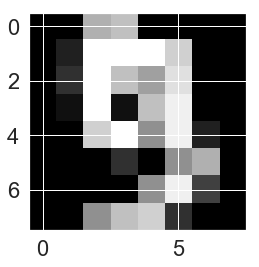

In [10]:
plt.gray()
plt.imshow(digits.images[9])

### Aplicar PCA

In [11]:
pca = PCA(n_components=8)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_.shape

(8, 64)

#### Avaliar variância

In [13]:
pc_labels = []

for i in range(pca.components_.shape[0]):
    pc_labels.append('PC{}'.format(i+1))

print(pc_labels)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']


In [16]:
data = {'Variance':pca.explained_variance_ratio_, 'Principal Components': pc_labels}

df_variance = pd.DataFrame(data)
sns.barplot(x='Principal Components', y='Variance', data=df_variance, color='c');

### PCA com apenas 2 dimensões

In [19]:
pca = PCA(n_components=2)
digits_transformed = pca.fit_transform(digits.data)
print(digits_transformed.shape)

(1797, 2)


In [28]:
df = pd.DataFrame(digits_transformed, columns=['x', 'y'])
df['label'] = digits.target
df.head()

x          y  label
0  -1.259465  21.274881      0
1   7.957618 -20.768707      1
2   6.991918  -9.955980      2
3 -15.906102   3.332457      3
4  23.306866   4.269067      4

### Plotar resultados

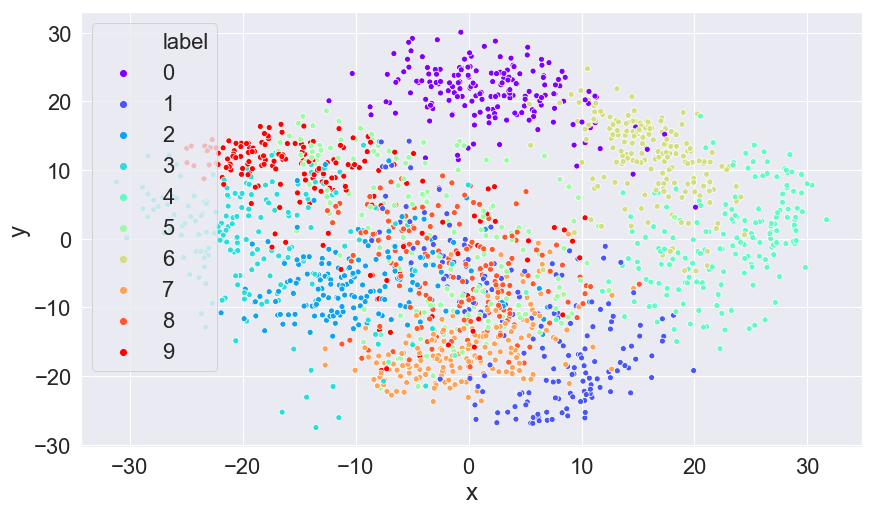

In [32]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')